In [1]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

$$ w = (X^TX)^{-1}X^TY $$


In [2]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        
        n, k = X.shape
        
        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y

        return self
        
    def predict(self, X):
        n, k = X.shape
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred
    
    def get_weights(self):
        return self.w
    

In [3]:
def linear_expression(x):
    return 5 * x + 6

In [4]:
objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = linear_expression(X) + np.random.randn(objects_num) * 5
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [5]:
regressor = MyLinearRegression()

regressor.fit(X_train[:, np.newaxis], y_train)

In [6]:
from sklearn.metrics import mean_squared_error

train_predictions = regressor.predict(X_train[:, np.newaxis])
test_predictions = regressor.predict(X_test[:, np.newaxis])

print('Train MSE: ', mean_squared_error(y_train, train_predictions))
print('Test MSE: ', mean_squared_error(y_test, test_predictions))

Train MSE:  16.976462331891746
Test MSE:  21.056034706555902


Давайте добавим градиентную оптимизацию


$$
\frac{\partial{L}}{\partial{w}} = \frac{2}{n}(X^TXw - X^TY) = \frac{2}{n}X^T(y_{pred} - Y) \,\, \in \mathbb{R}^{m \times 1}
$$

In [7]:
class MyGradientLinearRegression(MyLinearRegression):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = None
    
    def fit(self, X, y, lr=0.0001, max_iter=100):
        # Принимает на вход X, y и вычисляет веса по данной выборке

        n, k = X.shape

        # случайно инициализируем веса
        if self.w is None:
            self.w = np.random.randn(k + 1 if self.fit_intercept else k)
        
        X_train = np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X
        
        self.losses = []
        
        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y_pred, y))

            grad = self._calc_gradient(X_train, y, y_pred)

            assert grad.shape == self.w.shape, f"gradient shape {grad.shape} is not equal weight shape {self.w.shape}"
            self.w -= lr * grad

        return self

    def _calc_gradient(self, X, y, y_pred):
        grad = 2 * (y_pred - y)[:, np.newaxis] * X
        grad = grad.mean(axis=0)
        print(grad)
        return grad

    def get_losses(self):
        return self.losses

In [11]:
#Посчитаю предсказания на сгенеренном датасете
regressor = MyGradientLinearRegression(fit_intercept=True)

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100, lr = 0.01).get_losses()

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

[-105.08355802  -23.23745266]
[-89.42191218 -21.27150992]
[-76.07308596 -19.56862384]
[-64.69592524 -18.09049299]
[-54.99959093 -16.80445563]
[-46.73613839 -15.68265807]
[-39.69419128 -14.70134579]
[-33.69354839 -13.840259  ]
[-28.58058581 -13.08211741]
[-24.22433733 -12.41218098]
[-20.51315274 -11.8178754 ]
[-17.35184911 -11.28847285]
[-14.65928214 -10.81481984]
[-12.36627569 -10.38910513]
[-10.41385669 -10.00466194]
[-8.75175034 -9.65579932]
[-7.33709728 -9.33765833]
[-6.13335993 -9.04608949]
[-5.10939012 -8.77754827]
[-4.23863423 -8.52900602]
[-3.49845558 -8.29787398]
[-2.86955674 -8.08193856]
[-2.335487   -7.87930612]
[-1.88222258 -7.6883559 ]
[-1.49780863 -7.50769989]
[-1.17205413 -7.33614863]
[-0.89627172 -7.17268202]
[-0.66305592 -7.0164245 ]
[-0.4660941  -6.86662378]
[-0.30000526 -6.72263282]
[-0.16020261 -6.58389437]
[-0.04277648 -6.44992788]
[ 0.05560562 -6.32031823]
[ 0.13778408 -6.19470623]
[ 0.20617982 -6.07278045]
[ 0.26285613 -5.95427027]
[ 0.30957145 -5.83893995]
[ 0.34

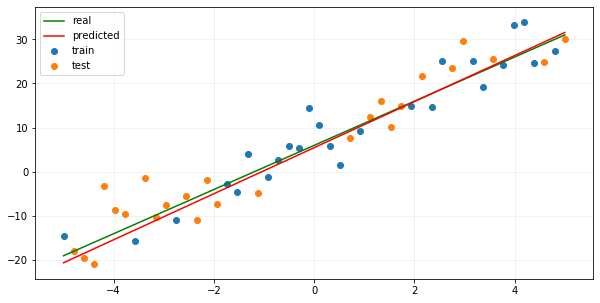

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

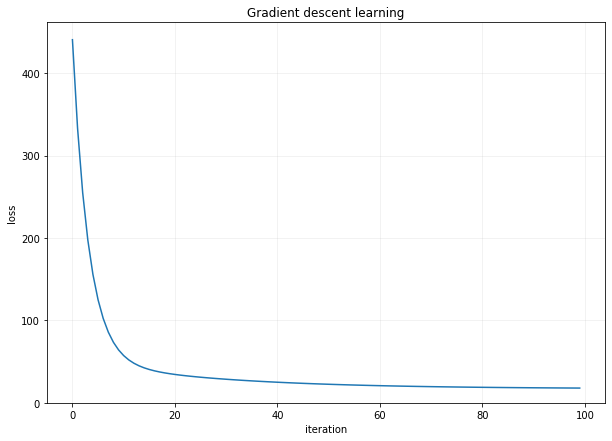

In [13]:
#Высрем график лосса
plt.figure(figsize=(10, 7))

plt.plot(l)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.ylim(bottom=0)
plt.grid(alpha=0.2)

plt.show()

In [80]:
train_predictions = regressor.predict(X_train[:, np.newaxis])
test_predictions = regressor.predict(X_test[:, np.newaxis])

print('Train MSE: ', mean_squared_error(y_train, train_predictions))
print('Test MSE: ', mean_squared_error(y_test, test_predictions))

Train MSE:  24.01451850881371
Test MSE:  33.234662246229306


In [14]:
df = pd.read_csv('insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [16]:
num_features = []
cat_features = []

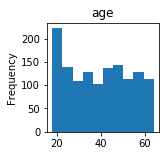

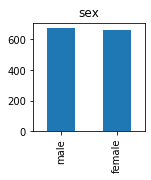

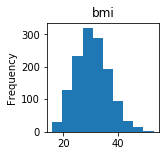

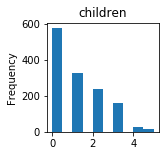

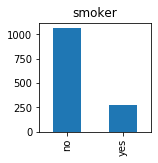

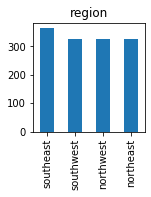

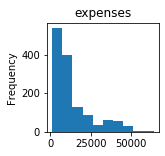

In [17]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
for column in df:
    plt.figure(column, figsize=(2,2))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
        num_features.append(column)
    elif is_string_dtype(df[column]):
        df[column].value_counts()[:10].plot(kind = 'bar')
        cat_features.append(column)

In [18]:
cat_features

['sex', 'smoker', 'region']

In [19]:
num_features

['age', 'bmi', 'children', 'expenses']

In [20]:
df['expenses'] = np.log2(df['expenses'] + 1)

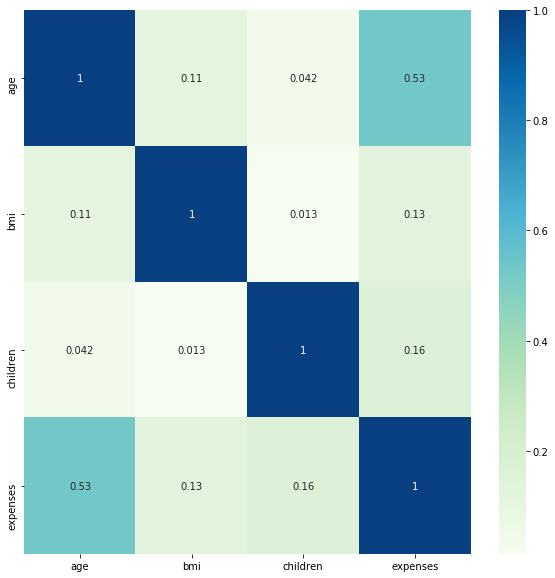

In [21]:
plt.figure(column, figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, cmap = 'GnBu', annot=True)

In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [23]:
for feat in cat_features:
    df[feat] = LabelEncoder().fit_transform(df[feat])

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,14.043533
1,18,1,33.8,1,0,2,10.753676
2,28,1,33.0,3,0,2,12.119739
3,33,1,22.7,0,0,1,14.424263
4,32,1,28.9,0,0,1,11.917320


In [25]:
X = df.drop(columns=['expenses'], axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [26]:
y = df['expenses']
y

0       14.043533
1       10.753676
2       12.119739
3       14.424263
4       11.917320
          ...    
1333    13.371988
1334    11.107858
1335    10.671391
1336    10.972226
1337    14.830830
Name: expenses, Length: 1338, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6,random_state=23)

In [28]:
from sklearn.linear_model import LinearRegression

my_lin_reg = MyGradientLinearRegression()
my_lin_reg.fit(X_train, y_train).get_losses()

y_pred_mylr = my_lin_reg.predict(X_test)



#lin_reg = LinearRegression()
#lin_reg.fit(X_train,y_train)

#y_pred_LR = lin_reg.predict(X_test)

[-3612.18460993   -44.90086416 -2724.24524183   -96.17186303
   -18.29196653  -126.27777038   -86.54706613]
[-1659.65660678   -21.41626291 -1288.87101481   -47.35071813
    -8.85663424   -58.62299682   -41.01904257]
[-753.31190999  -10.50662691 -621.95790574  -24.67172782   -4.47258587
  -27.18951251  -19.86977259]
[-332.75077689   -5.43617677 -311.88179237  -14.13182811   -2.43411703
  -12.57547321  -10.04077004]
[-137.75519135   -3.07719426 -167.50748031   -9.22878167   -1.48485008
   -5.77174895   -5.46840639]
[ -47.49463609   -1.97734175 -100.08242669   -6.94331299   -1.04139313
   -2.59500148   -3.33707133]
[ -5.86230245  -1.46223403 -68.3948321   -5.87343808  -0.83285106
  -1.10271878  -2.3393515 ]
[ 13.19457185  -1.2187233  -53.30814484  -5.36815211  -0.73343465
  -0.39290243  -1.86815535]
[ 21.77334273  -1.10140008 -45.9363178   -5.1251628   -0.68473369
  -0.04671014  -1.64158141]
[ 25.49126215  -1.04274314 -42.1530632   -5.00410034  -0.65962506
   0.13034984  -1.52872822]
[ 26

In [29]:
from sklearn.metrics import mean_squared_error
#print(mean_squared_error(y_pred_LR, y_test))

In [48]:
#print(lin_reg.score(X_test,y_test))

In [30]:
print(mean_squared_error(y_pred_mylr, y_test))

6.8050652023591


In [31]:
from sklearn.metrics import mean_absolute_percentage_error
#print(mean_absolute_percentage_error(y_pred_LR, y_test))
print(mean_absolute_percentage_error(y_pred_mylr, y_test))

0.1903678590153385


In [33]:
df = pd.read_csv('winequality-red.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [35]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
211,8.0,0.725,0.24,2.8,0.083,10.0,62.0,0.99685,3.35,0.56,10.0,6
1216,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
859,6.8,0.560,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2,6
974,8.8,0.330,0.41,5.9,0.073,7.0,13.0,0.99658,3.30,0.62,12.1,7


In [36]:
num_features = []
cat_features = []

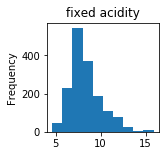

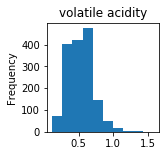

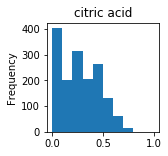

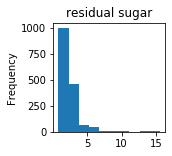

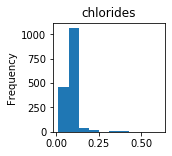

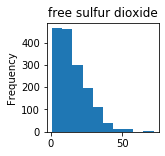

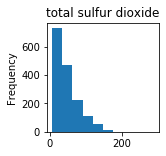

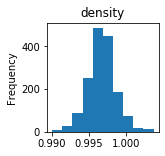

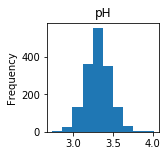

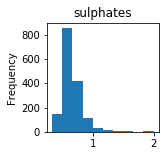

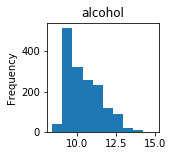

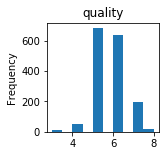

In [37]:
for column in df:
    plt.figure(column, figsize=(2,2))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
        num_features.append(column)
    elif is_string_dtype(df[column]):
        df[column].value_counts()[:10].plot(kind = 'bar')
        cat_features.append(column)

In [39]:
df['residual sugar'] = np.log2(df['residual sugar'] + 1)
df['free sulfur dioxide'] = np.log2(df['residual sugar'] + 1)
df['total sulfur dioxide'] = np.log2(df['residual sugar'] + 1)
df['alcohol'] = np.log2(df['residual sugar'] + 1)


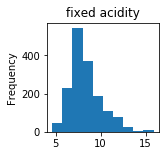

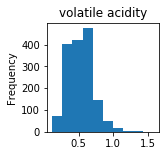

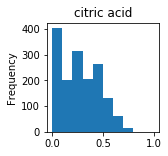

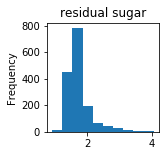

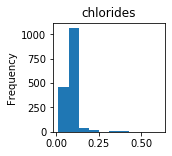

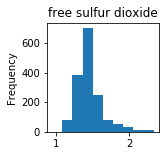

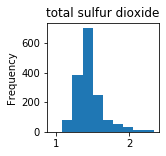

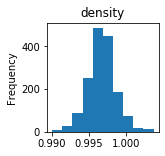

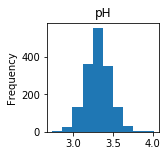

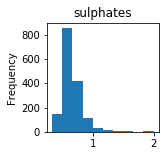

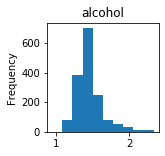

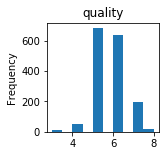

In [40]:
for column in df:
    plt.figure(column, figsize=(2,2))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
        num_features.append(column)

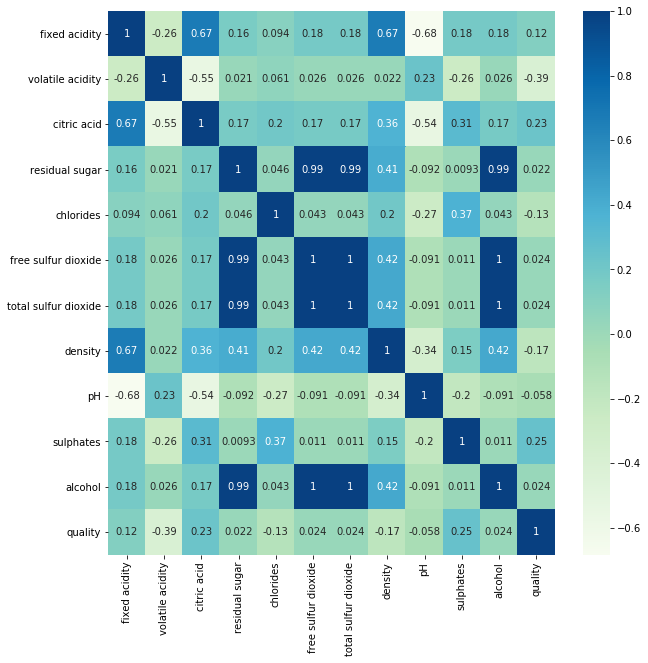

In [41]:
plt.figure(column, figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, cmap = 'GnBu', annot=True)

In [42]:
X = df.drop(columns=['quality'], axis=1)
y = df['quality']

In [44]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,1.584963,0.090,1.370143,1.370143,0.99490,3.45,0.58,1.370143,5
1595,5.9,0.550,0.10,1.678072,0.062,1.421195,1.421195,0.99512,3.52,0.76,1.421195,6
1596,6.3,0.510,0.13,1.722466,0.076,1.444914,1.444914,0.99574,3.42,0.75,1.444914,6
1597,5.9,0.645,0.12,1.584963,0.075,1.370143,1.370143,0.99547,3.57,0.71,1.370143,5
1598,6.0,0.310,0.47,2.201634,0.067,1.678808,1.678808,0.99549,3.39,0.66,1.678808,6


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6,random_state=23)

In [46]:
my_lin_reg = MyGradientLinearRegression()
my_lin_reg.fit(X_train, y_train).get_losses()

y_pred_mylr = my_lin_reg.predict(X_test)


[-35.86860343  -2.24754698  -1.13102615  -6.98109184  -0.36061196
  -5.99131823  -5.99131823  -4.31003039 -14.35944427  -2.89949074
  -5.99131823  -4.32558453]
[-35.17537671  -2.20605613  -1.10729115  -6.83921407  -0.35366571
  -5.87472302  -5.87472302  -4.23046083 -14.09646115  -2.84675104
  -5.87472302  -4.2457798 ]
[-34.49547722  -2.16536266  -1.0840126   -6.70006362  -0.34685298
  -5.76036899  -5.76036899  -4.15242061 -13.83853235  -2.79502505
  -5.76036899  -4.16750891]
[-33.82864876  -2.12545122  -1.06118173  -6.56358806  -0.34017121
  -5.64821304  -5.64821304  -4.07588032 -13.5855607   -2.74429328
  -5.64821304  -4.0907424 ]
[-33.17464005  -2.0863068   -1.03878993  -6.42973597  -0.33361787
  -5.53821292  -5.53821292  -4.00081114 -13.3374509   -2.69453662
  -5.53821292  -4.01545133]
[-32.53320465  -2.04791463  -1.01682877  -6.29845691  -0.3271905
  -5.43032719  -5.43032719  -3.92718477 -13.0941095   -2.64573632
  -5.43032719  -3.94160734]
[-31.90410085  -2.01026026  -0.99528996  

In [47]:
print(mean_squared_error(y_pred_mylr, y_test))

1.5605207349688819


In [48]:
print(mean_absolute_percentage_error(y_pred_mylr, y_test))

0.18848477187472532


In [49]:
def rounder(array):
    rounded_array=[]
    for i in array:
        rounded_array.append(int(i))
    return np.array(rounded_array)

In [50]:
ols_pred=my_lin_reg.predict(X_test)
rounded_pred_ols=rounder(ols_pred)
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(rounded_pred_ols,y_test))}')

The RMSE of sklearn model: 1.4814829282400344
